# **Retno Dewi Yulianti**
**Fresh Graduate Academy - Machine Learning IBM**

*Dicoding ->> Proyek Pertama : Membuat Model NLP dengan TensorFlow*

* **Data Source**: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
* **Data Set Information**: Created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
* **Data Set Names**: amazon_cells_labelled.txt 

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')

In [ ]:
df.tail()

,sentence,label
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0
999,"You can not answer calls with the unit, never ...",0


In [ ]:
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 1s - loss: 0.6930 - accuracy: 0.5163 - val_loss: 0.6927 - val_accuracy: 0.5300
Epoch 2/30
25/25 - 0s - loss: 0.6917 - accuracy: 0.6275 - val_loss: 0.6914 - val_accuracy: 0.7000
Epoch 3/30
25/25 - 0s - loss: 0.6893 - accuracy: 0.6712 - val_loss: 0.6895 - val_accuracy: 0.5550
Epoch 4/30
25/25 - 0s - loss: 0.6847 - accuracy: 0.6625 - val_loss: 0.6862 - val_accuracy: 0.5450
Epoch 5/30
25/25 - 0s - loss: 0.6793 - accuracy: 0.6712 - val_loss: 0.6814 - val_accuracy: 0.5450
Epoch 6/30
25/25 - 0s - loss: 0.6673 - accuracy: 0.7100 - val_loss: 0.6727 - val_accuracy: 0.7200
Epoch 7/30
25/25 - 0s - loss: 0.6530 - accuracy: 0.7462 - val_loss: 0.6622 - val_accuracy: 0.6700
Epoch 8/30
25/25 - 0s - loss: 0.6333 - accuracy: 0.7688 - val_loss: 0.6482 - val_accuracy: 0.6950
Epoch 9/30
25/25 - 0s - loss: 0.6089 - accuracy: 0.7800 - val_loss: 0.6313 - val_accuracy: 0.7000
Epoch 10/30
25/25 - 0s - loss: 0.5804 - accuracy: 0.7912 - val_loss: 0.6119 - val_accuracy: 0.7150
Epoch 11/30
25/25 -

## **LSTM (Long Short-Term Memory)**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')

In [ ]:
category = pd.get_dummies(df.label)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='label')
df_baru

,sentence,0,1
0,So there is no way for me to plug it in here i...,1,0
1,"Good case, Excellent value.",0,1
2,Great for the jawbone.,0,1
3,Tied to charger for conversations lasting more...,1,0
4,The mic is great.,0,1
...,...,...,...
995,The screen does get smudged easily because it ...,1,0
996,What a piece of junk.. I lose more calls on th...,1,0
997,Item Does Not Match Picture.,1,0
998,The only thing that disappoint me is the infra...,1,0


In [ ]:
kalimat = df_baru['sentence'].values
label = df_baru[[0, 1]].values

In [ ]:
from sklearn.model_selection import train_test_split
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
25/25 - 2s - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6907 - val_accuracy: 0.6000
Epoch 2/30
25/25 - 0s - loss: 0.6753 - accuracy: 0.6600 - val_loss: 0.6635 - val_accuracy: 0.5600
Epoch 3/30
25/25 - 0s - loss: 0.4345 - accuracy: 0.8512 - val_loss: 0.5852 - val_accuracy: 0.7300
Epoch 4/30
25/25 - 0s - loss: 0.1765 - accuracy: 0.9325 - val_loss: 0.6067 - val_accuracy: 0.7500
Epoch 5/30
25/25 - 0s - loss: 0.0589 - accuracy: 0.9862 - val_loss: 0.7886 - val_accuracy: 0.7850
Epoch 6/30
25/25 - 0s - loss: 0.0134 - accuracy: 0.9975 - val_loss: 1.0776 - val_accuracy: 0.7900
Epoch 7/30
25/25 - 1s - loss: 0.0061 - accuracy: 0.9987 - val_loss: 1.1438 - val_accuracy: 0.7650
Epoch 8/30
25/25 - 0s - loss: 0.0036 - accuracy: 0.9987 - val_loss: 1.2339 - val_accuracy: 0.7750
Epoch 9/30
25/25 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2966 - val_accuracy: 0.7700
Epoch 10/30
25/25 - 0s - loss: 5.6376e-04 - accuracy: 1.0000 - val_loss: 1.3591 - val_accuracy: 0.7900
Epoch 11/30
25/

## **Using Callback**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')

In [ ]:
category = pd.get_dummies(df.label)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='label')
df_baru

,sentence,0,1
0,So there is no way for me to plug it in here i...,1,0
1,"Good case, Excellent value.",0,1
2,Great for the jawbone.,0,1
3,Tied to charger for conversations lasting more...,1,0
4,The mic is great.,0,1
...,...,...,...
995,The screen does get smudged easily because it ...,1,0
996,What a piece of junk.. I lose more calls on th...,1,0
997,Item Does Not Match Picture.,1,0
998,The only thing that disappoint me is the infra...,1,0


In [ ]:
kalimat = df_baru['sentence'].values
label = df_baru[[0, 1]].values

In [ ]:
from sklearn.model_selection import train_test_split
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
# Callback: used for end training process if accuracy is convenient
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nFulfilled Accuration.")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, validation_data=(padded_test, label_test), 
                    verbose=2,
                    callbacks=[callbacks]
)

Epoch 1/30
25/25 - 3s - loss: 0.6918 - accuracy: 0.5238 - val_loss: 0.6887 - val_accuracy: 0.5350
Epoch 2/30
25/25 - 0s - loss: 0.6517 - accuracy: 0.6600 - val_loss: 0.6040 - val_accuracy: 0.6600
Epoch 3/30
25/25 - 0s - loss: 0.3954 - accuracy: 0.8487 - val_loss: 0.4030 - val_accuracy: 0.8200
Epoch 4/30
25/25 - 0s - loss: 0.1391 - accuracy: 0.9513 - val_loss: 0.4062 - val_accuracy: 0.8350
Epoch 5/30
25/25 - 0s - loss: 0.0632 - accuracy: 0.9825 - val_loss: 0.3902 - val_accuracy: 0.8500

Fulfilled Accuration.


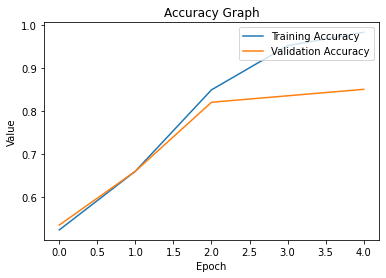

In [ ]:
from matplotlib import pyplot as plt
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

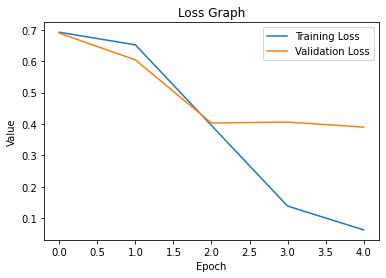

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()